# 口袋妖怪数据集分析


Kernel 地址：https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners/notebook

数据科学家

在本教程中，我向您解释需要成为一名数据科学家。

数据科学家需要具备以下技能：

1、基本工具：像 python，R 或 SQL 。

你不需要知道一切。你只需要学习如何使用 python 基础统计：像平均值，中位数或标准差。

如果您了解基本统计信息，则可以轻松使用 python。

2、数据 Munging：处理混乱和困难的数据。就像一个不一致的日期和字符串格式。正如你猜的那样，python 帮助了我们。

3、数据可视化：标题实际上是解释性的。我们将使用像 matplotlib 和 seaborn 库这样的 python来可视化数据。

4、机器学习：你不需要理解机器学习技术背后的数学。您只需要了解机器学习的基础知识，并学习如何在使用 python 时实现它。

作为总结，我们将学习 python 成为数据科学家！

1、Python 简介

2、Python 数据科学工具

3、数据清理


4、Pandas 基础

5、使用Pandas操纵数据框架

6、数据可视化

7、机器学习

https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners/

8、深度学习

https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

9、时间序列分析

https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda

10、统计学

https://www.kaggle.com/kanncaa1/basic-statistic-tutorial-for-beginners

11、深度学习中 PyTorch 的使用

+ 人工神经网络 https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
+ 卷积神经网络 https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
+ 循环神经网络 https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [3]:
!ls

combats.csv
pokemon.csv
tests.csv
初学者数据科学教程-口袋妖怪数据集分析.ipynb
网址.txt


In [7]:
data = pd.read_csv('./pokemon.csv')
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [9]:
# 因为特征很多都是数值型的，因此计算相关系数矩阵
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


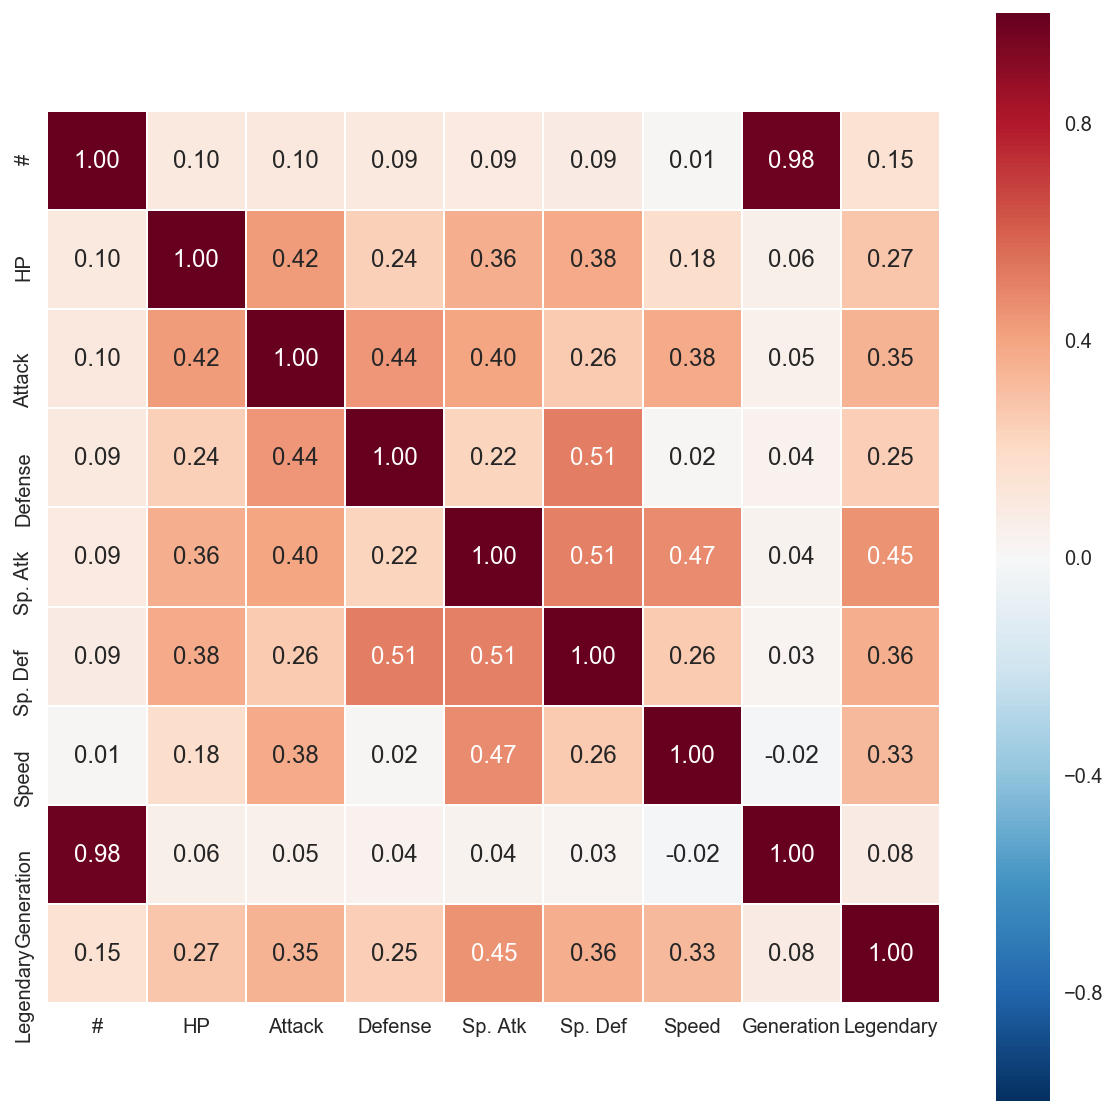

In [14]:
# 使用相关系数矩阵，画出热力图
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5,
            fmt='.2f', ax=ax, square=True)
plt.show()

In [15]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [16]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1、简单介绍 Python

matplotlib ，最简单的图表是：线图、散点图、和直方图。

+ 线图在 x 是时间序列的时候用；
+ 散点图用在两个连续变量是相关的时候；
+ 如果我们要看一个连续变量的分布，用直方图；
+ 自定义：颜色，标签，线条粗细，标题，不透明度，网格，figsize，轴和线条的刻度

## 线图

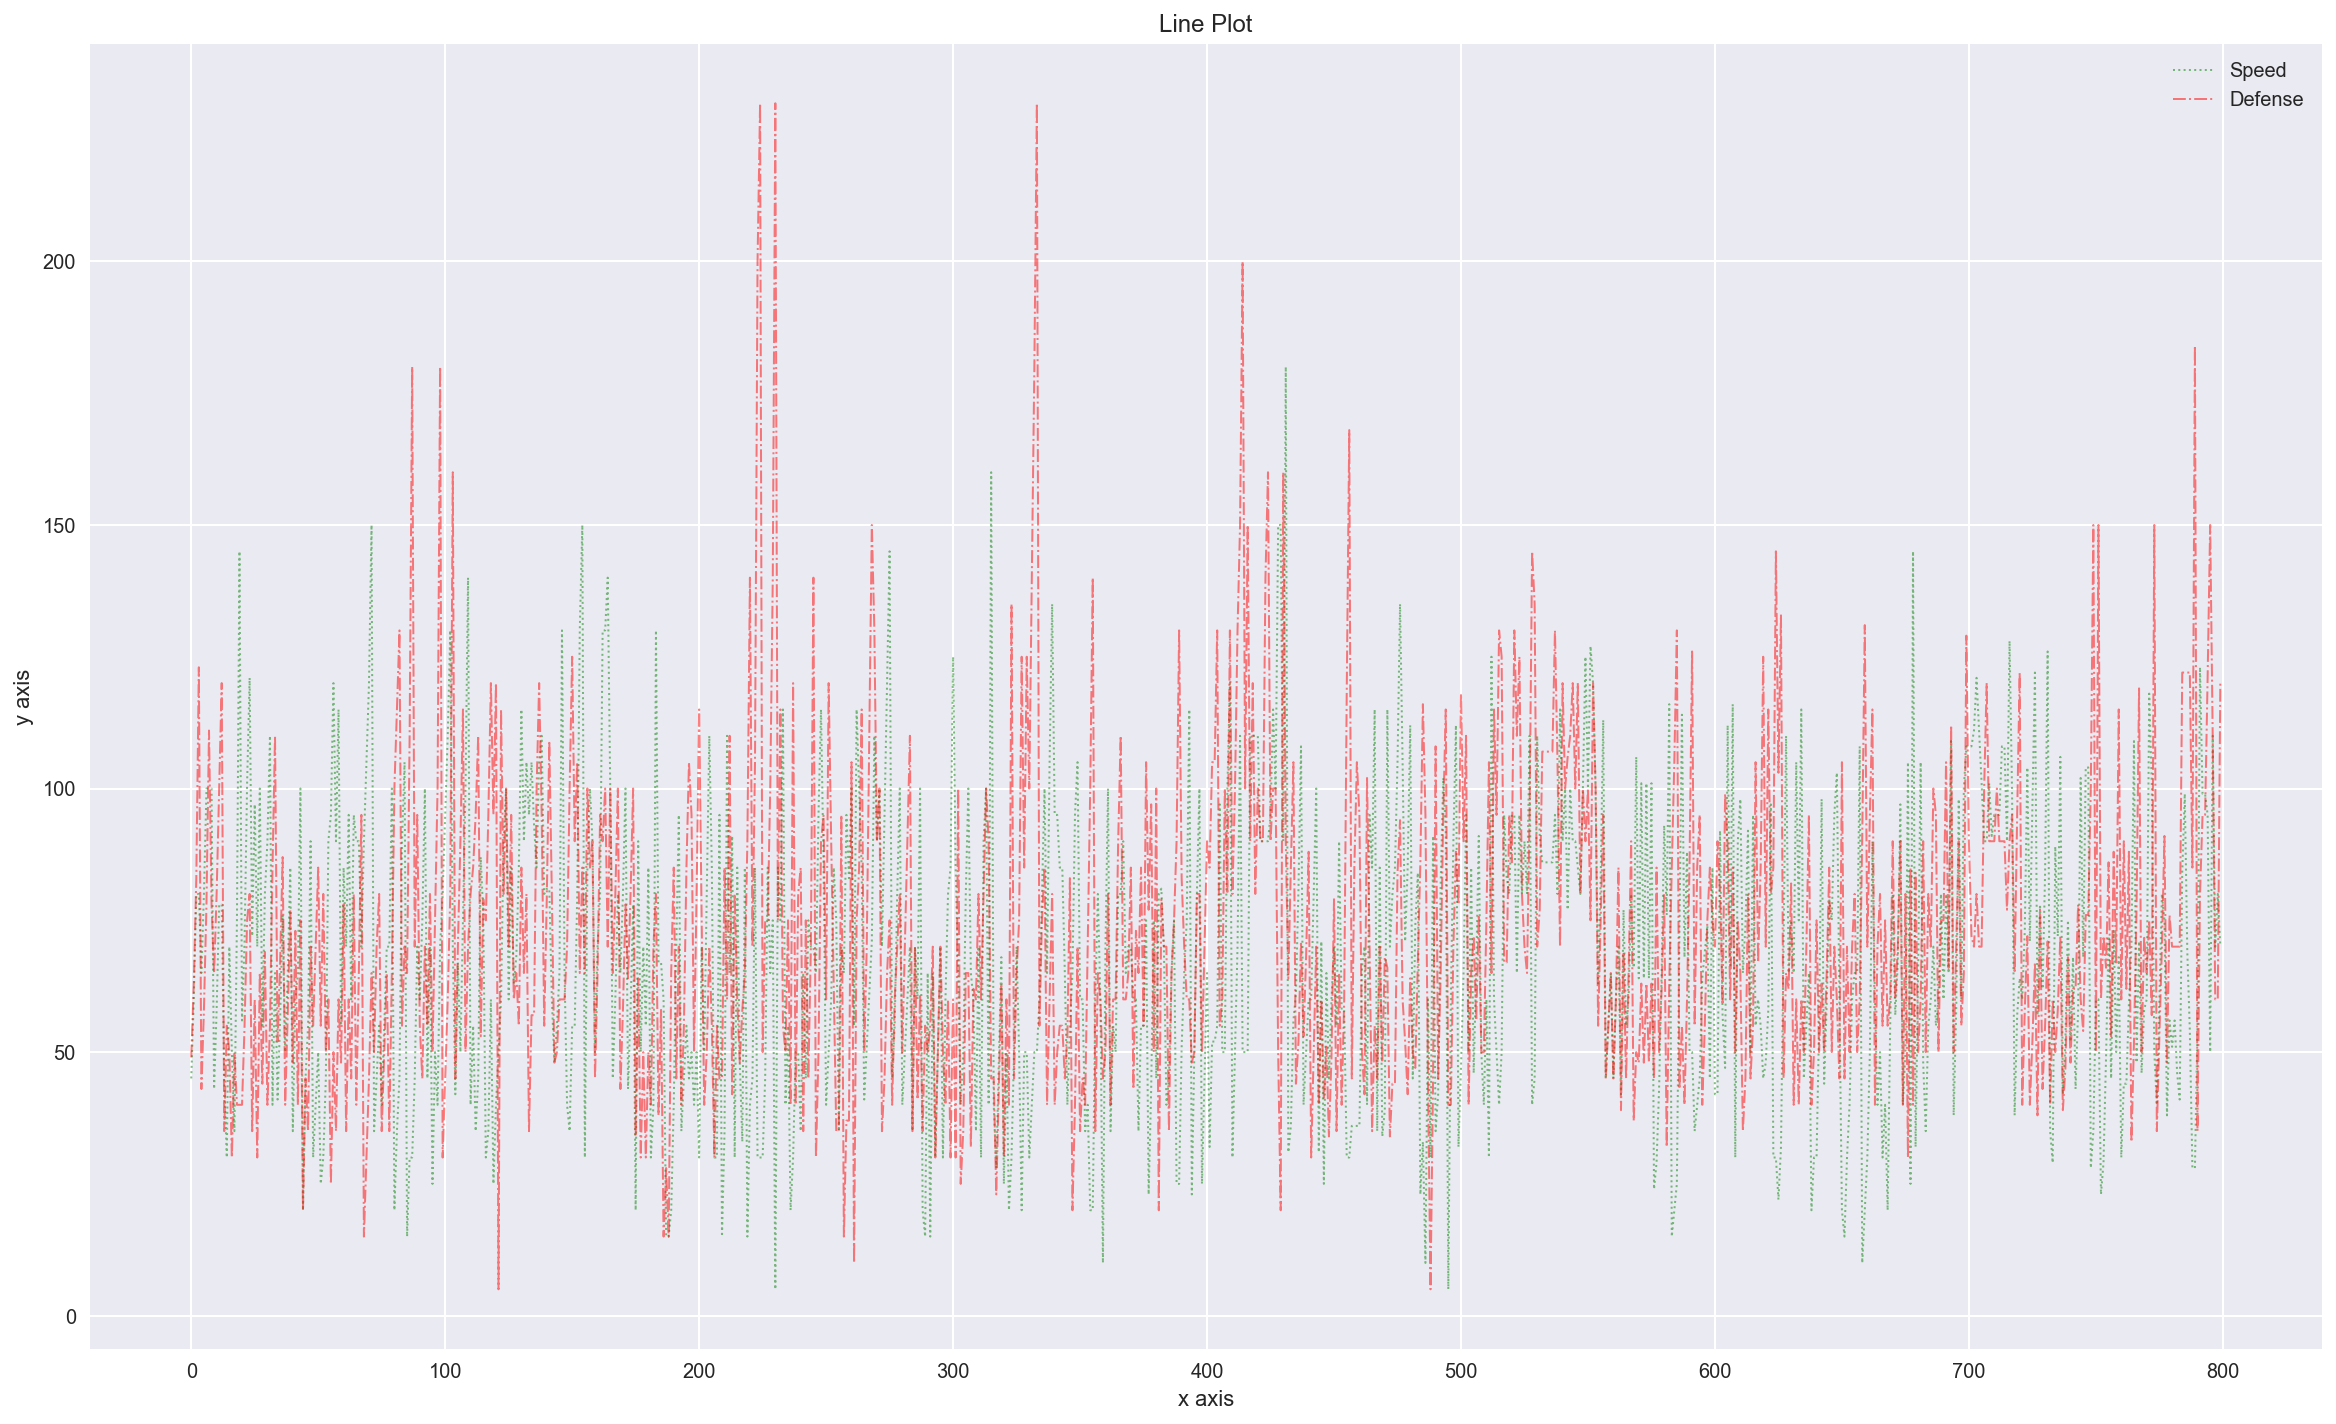

In [25]:
# 速度
data.Speed.plot(kind='line', color='g', label='Speed',
                linewidth=1, alpha=0.5, grid=True, linestyle=':', figsize=(20, 12))
# 防御
data.Defense.plot(color='r', label='Defense', linewidth=1,
                  alpha=0.5, grid=True, linestyle='-.', figsize=(20, 12))
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

## 散点图

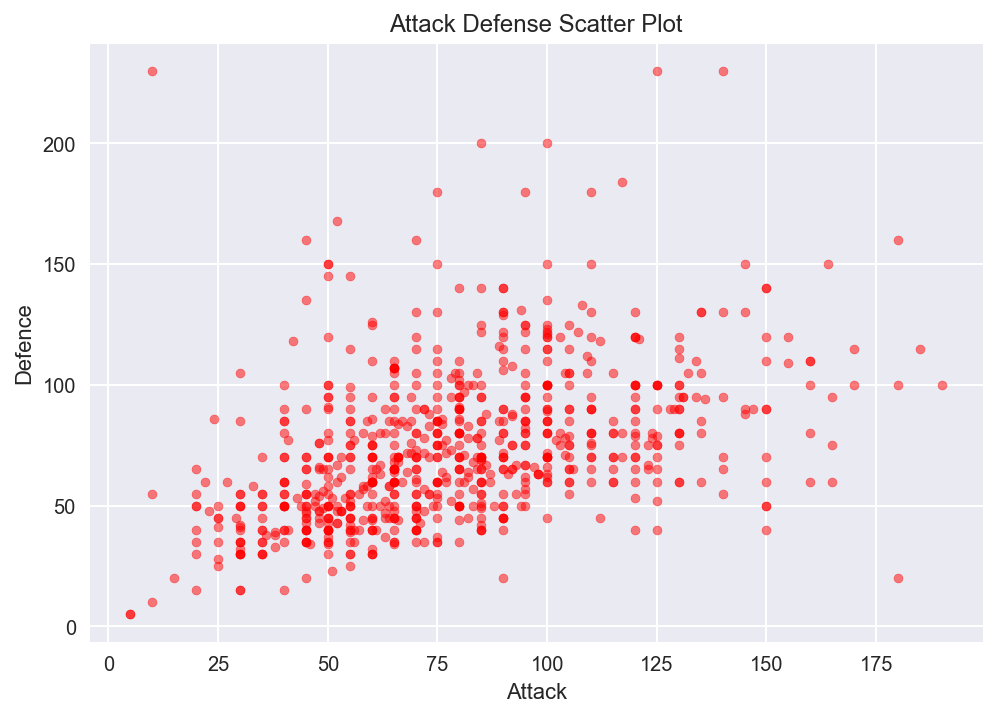

In [19]:
# x 攻击 y 防御

data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')    
plt.show()

## 直方图

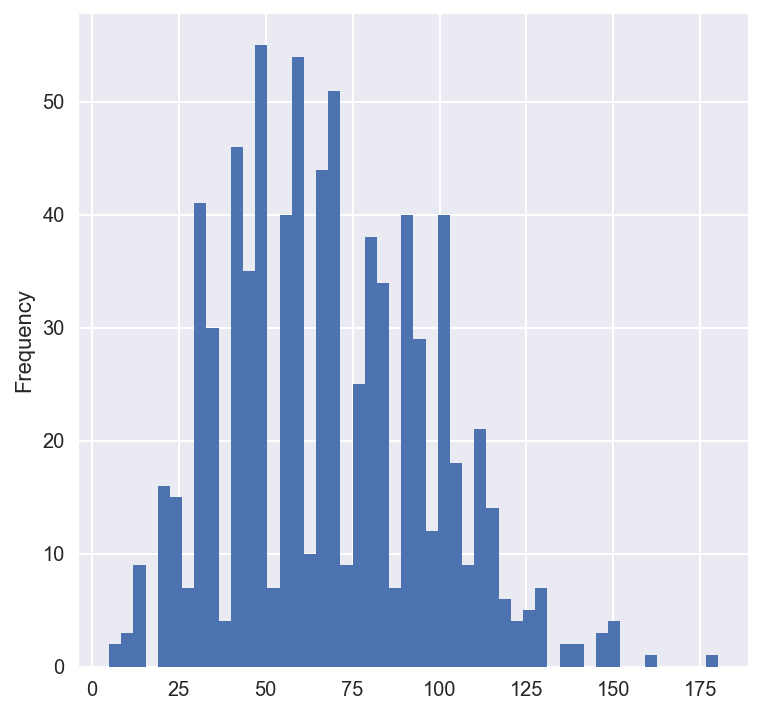

In [21]:
# 看速度的分布，用直方图
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind='hist', bins=50, figsize=(6, 6))
plt.show()

In [27]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 576x396 with 0 Axes>

## 下面是一些 Python 基础

In [28]:
# create dictionary and look its keys and values
dictionary = {'spain': 'madrid', 'usa': 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [29]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [30]:
# In order to run all code you need to take comment this line
# del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

{}


## Pandas 教程

In [32]:
# Defense 防守
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [36]:
# 1 - Filtering Pandas data frame
# There are only 3 pokemons who have higher defense value than 200
# 防御大于 200 的有这些
x = data['Defense'] > 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [35]:
data[data['Defense'] > 200]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [37]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [40]:
# 逻辑与，两者都是真，才真
np.logical_and([True, True, False], [True, False, False])

array([ True, False, False])

In [42]:
# 直接使用 & 就可以
data[(data['Defense'] > 200) & (data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [53]:
data[['Attack']][10:11]

,Attack
10,63


In [52]:
for index, value in data[['Attack']][10:11].iterrows():
    print(index, ' === ', value)

10  ===  Attack    63
Name: 10, dtype: int64


In [54]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [58]:
data.Speed.sum(), len(data.Speed)

(54622, 800)

In [59]:
data.Speed.mean()

68.2775

In [61]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
threshold

68.2775

In [63]:
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
# we will learn loc more detailed later
data.loc[:10, ["speed_level", "Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


到目前为止，你学习

用户定义的功能
范围
嵌套功能
默认和灵活的参数
Lambda函数
匿名功能
迭代器
列表理解

### 3、数据清洗

In [68]:
data = pd.read_csv('./pokemon.csv')
data.head()  # head shows first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [69]:
# tail shows last 5 rows
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [70]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [71]:
data.shape

(800, 12)

In [73]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [77]:
# 是否著名
data['Legendary'].head(5)

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

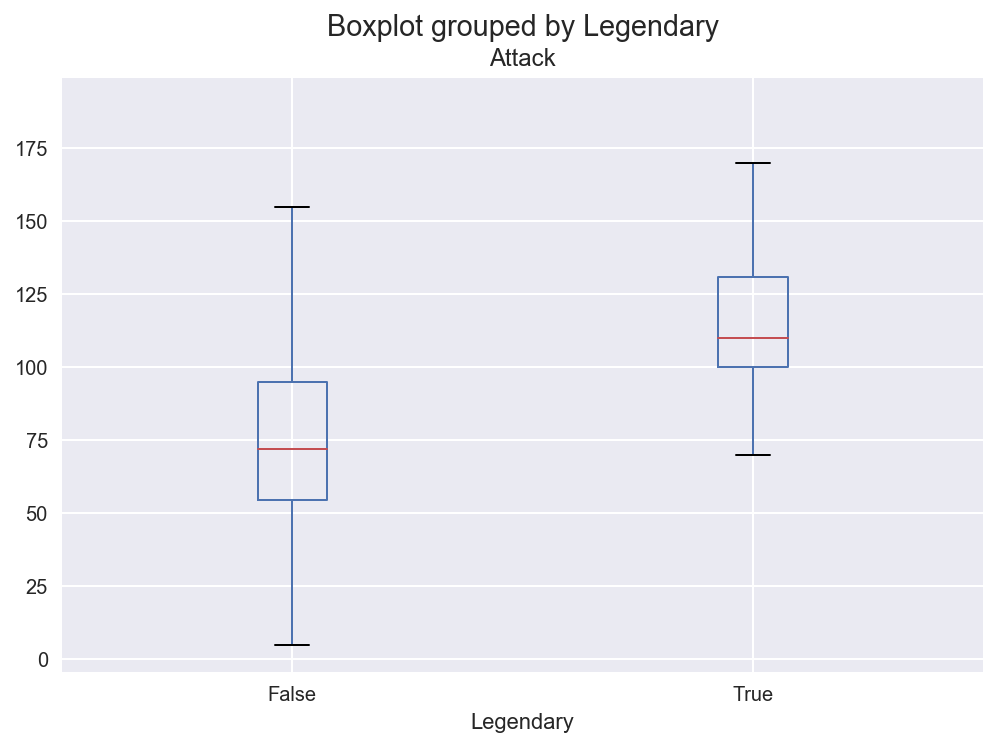

In [72]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

In [78]:
data_new = data.head()    # I only take 5 rows into new data
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## melted

In [82]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new, id_vars='Name',
                 value_vars=['Attack', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


## 数据透视表

In [83]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


## CONCATENATING DATA 数据连接
We can concatenate two dataframe

### 行合并

In [84]:
# Firstly lets create 2 data frame
data1 = data.head()
data2 = data.tail()
# axis = 0 : adds dataframes in row
conc_data_row = pd.concat([data1, data2], axis=0, ignore_index=True)
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


### 列合并

In [85]:
data1 = data['Attack'].head()
data1

0     49
1     62
2     82
3    100
4     52
Name: Attack, dtype: int64

In [86]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


数据类型有5种基本数据类型：对象（字符串），booleab，整数，浮点数和分类。

我们可以创建转换数据类型，例如从 str 到 category 或从 int 到 float

为什么类别很重要：

使内存中的数据帧更小可以用于 anlayis，特别是对于 sklearn（我们将在稍后介绍）。

In [87]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [88]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [92]:
data["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Rock        14
Ice         14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [94]:
# 结果中多了第一行 
# NaN         386，包括了 386 个空值
data["Type 2"].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [97]:
assert 1==1

In [99]:
data['Type 2'].notnull().all()

False

In [103]:
data['Type 2'].fillna('empty', inplace=True)

In [101]:
data['Type 2'].fillna('empty')

0      Poison
1      Poison
2      Poison
3      Poison
4       empty
5       empty
6      Flying
7      Dragon
8      Flying
9       empty
10      empty
11      empty
12      empty
13      empty
14      empty
15     Flying
16     Poison
17     Poison
18     Poison
19     Poison
20     Flying
21     Flying
22     Flying
23     Flying
24      empty
25      empty
26     Flying
27     Flying
28      empty
29      empty
        ...  
770     empty
771    Flying
772     Fairy
773     Fairy
774     empty
775     empty
776     empty
777     Fairy
778     Grass
779     Grass
780     Grass
781     Grass
782     Grass
783     Grass
784     Grass
785     Grass
786     Grass
787     Grass
788     empty
789     empty
790    Dragon
791    Dragon
792     empty
793    Flying
794    Ground
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [104]:
data['Type 2']

0      Poison
1      Poison
2      Poison
3      Poison
4       empty
5       empty
6      Flying
7      Dragon
8      Flying
9       empty
10      empty
11      empty
12      empty
13      empty
14      empty
15     Flying
16     Poison
17     Poison
18     Poison
19     Poison
20     Flying
21     Flying
22     Flying
23     Flying
24      empty
25      empty
26     Flying
27     Flying
28      empty
29      empty
        ...  
770     empty
771    Flying
772     Fairy
773     Fairy
774     empty
775     empty
776     empty
777     Fairy
778     Grass
779     Grass
780     Grass
781     Grass
782     Grass
783     Grass
784     Grass
785     Grass
786     Grass
787     Grass
788     empty
789     empty
790    Dragon
791    Dragon
792     empty
793    Flying
794    Ground
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [105]:
data['Type 2'].notnull().all()

True

In [108]:
assert data.columns[1] == 'Name'

In [113]:
data.Speed.dtypes

dtype('float64')

---

In [114]:
country = ["Spain", "France"]
population = ["11", "12"]
list_label = ["country", "population"]

In [116]:
list_col = [country, population]
list_col

[['Spain', 'France'], ['11', '12']]

In [118]:
zipped = list(zip(list_label, list_col))
zipped

[('country', ['Spain', 'France']), ('population', ['11', '12'])]

In [119]:
data_dict = dict(zipped)
data_dict

{'country': ['Spain', 'France'], 'population': ['11', '12']}

In [120]:
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [122]:
df["capital"] = ["madrid", "paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [123]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


## Pandas 画出来的图默认就是折线图

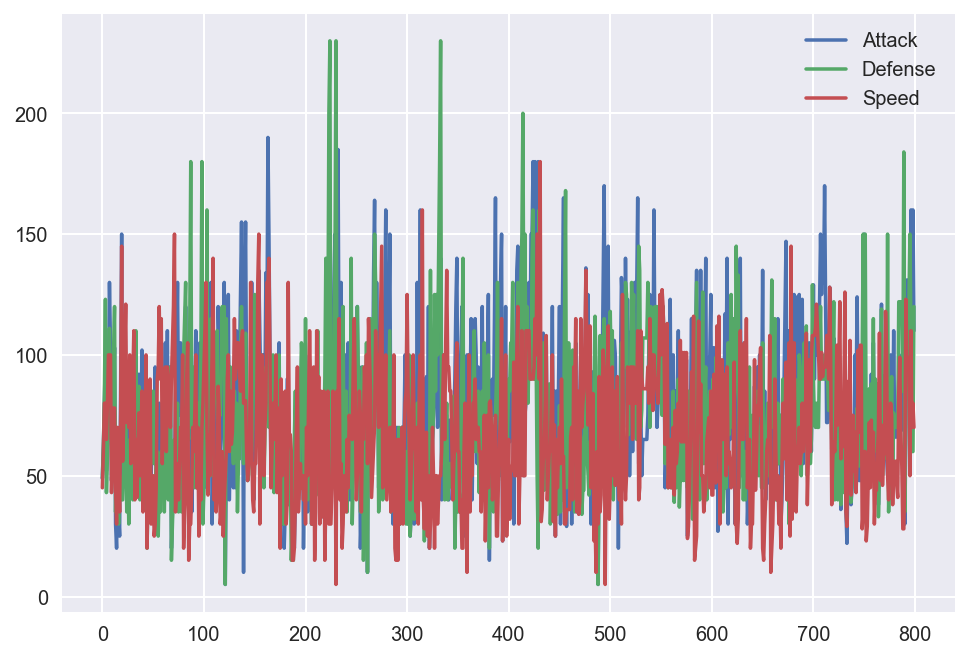

In [135]:
data1 = data[['Attack','Defense','Speed']]
data1.plot()
plt.show()
# it is confusing
# 作者说这个图

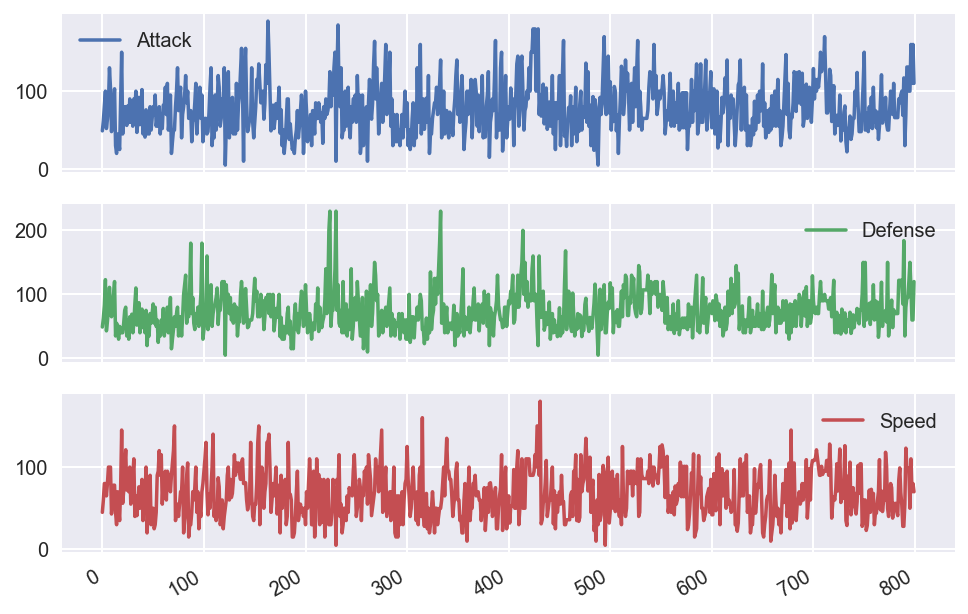

In [134]:
# subplots
data1 = data[['Attack','Defense','Speed']]
data1.plot(subplots=True)
plt.show()

## 两个连续变量，可以绘制散点图

In [139]:
from subprocess import check_output

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


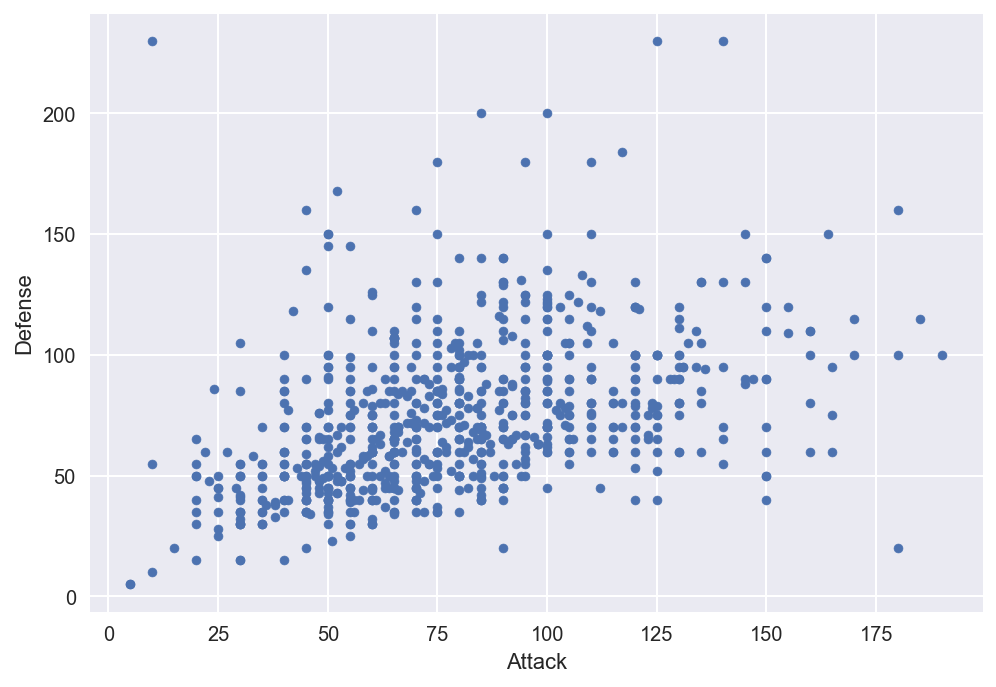

In [140]:
# data1['Attack']
# data1['Defense']
data1.plot(kind='scatter',x='Attack',y='Defense')
plt.show()

In [145]:
data1['Defense'].min(), data1['Defense'].max()

(5, 230)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


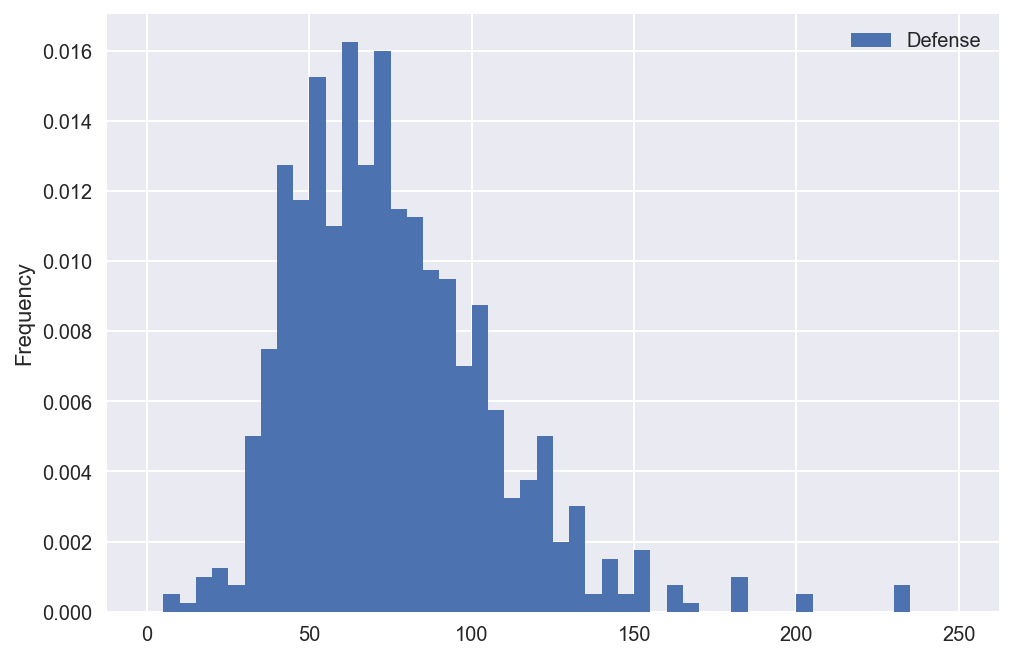

In [141]:
# hist plot
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250), normed=True)

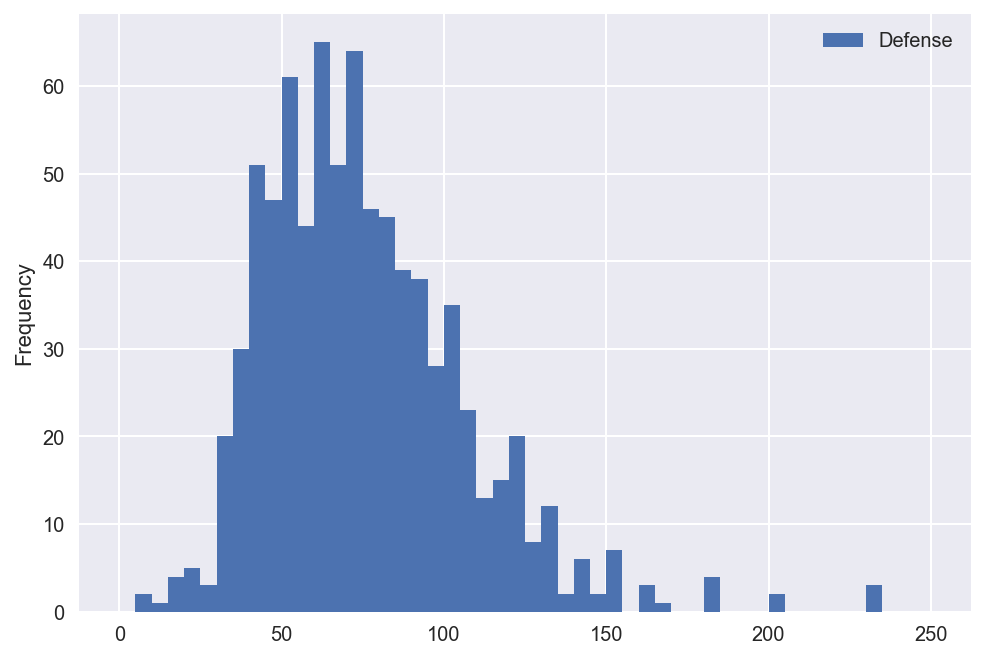

In [142]:
# hist plot
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250))

## 绘制子图

In [147]:
# close warning
import warnings
warnings.filterwarnings("ignore")

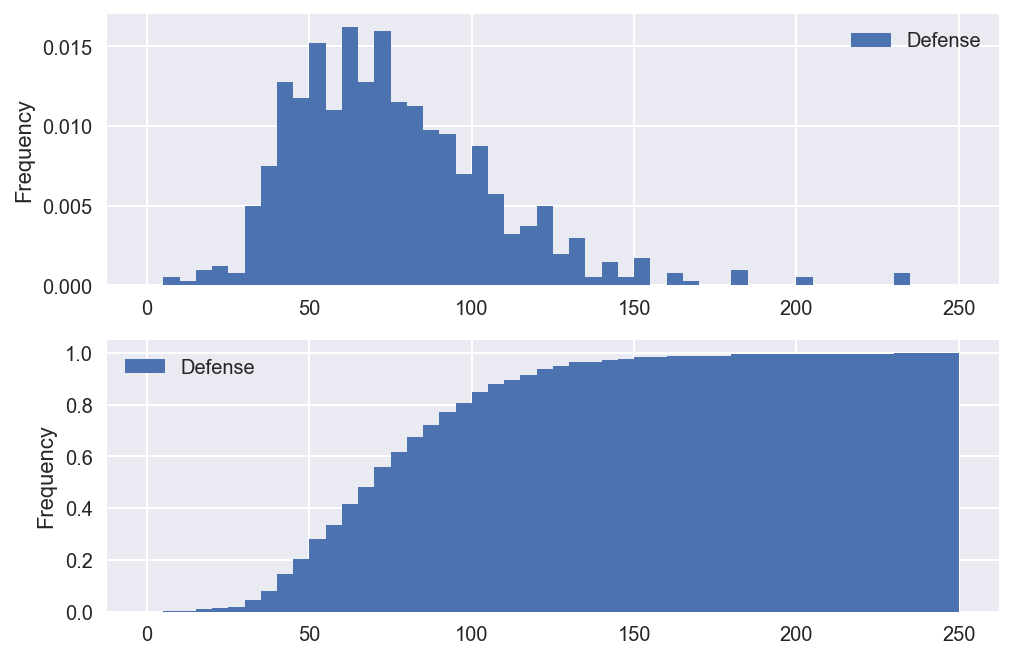

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind="hist", y="Defense", bins=50,
           range=(0, 250), normed=True, ax=axes[0])
data1.plot(kind="hist", y="Defense", bins=50, range=(
    0, 250), normed=True, ax=axes[1], cumulative=True)
# plt.savefig('graph.png')
# plt

附：常见时间频率

A year

M month

W week

D day

H hour

T minute

S second